<font color='#008000'> **Método de la bisección** </font>


-0.58642578125
Usando optimize :  -0.5867010192134785


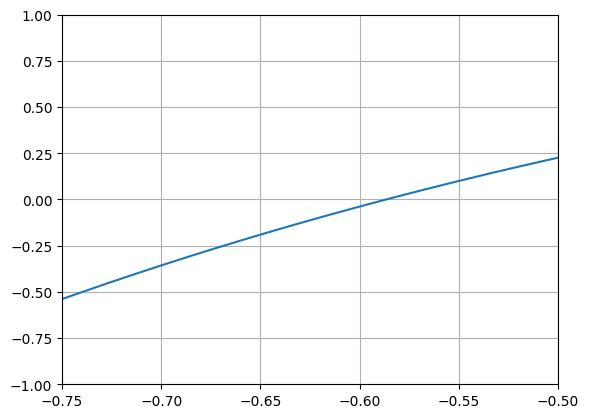

In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

#definición de la función
#****************************************
def f(x):
    return 2- np.exp(-x)+x**3
#****************************************


#definición de parámetros
#**************************
a = -0.75
b = 0.5
c = a
tol= 1e-3
max_inter = 100
contador = 0
#*************************


#ciclo con condiciones
#*************************************************************************
while (abs(f(c)) > tol) and (f(a)*f(b) < 0) and  (contador < max_inter) :

    c = (a+b)/2

    if f(c)*f(b) < 0 :
        a = c
    else:
        b = c


    contador += 1

#**************************************************************************


#se imprime el valor de la raiz
print(c)
print('Usando optimize : ',optimize.bisect(f,-0.75,0.5))




#Gráfica
x= np.linspace(-1,1,1000)
plt.plot(x,f(x))
plt.xlim(-0.75,-0.5)
plt.ylim(-1,1)
plt.grid()

<font color='#008000'> **Método de newton**

-0.994140625000000
Usando optimize :  -0.9999999875823656


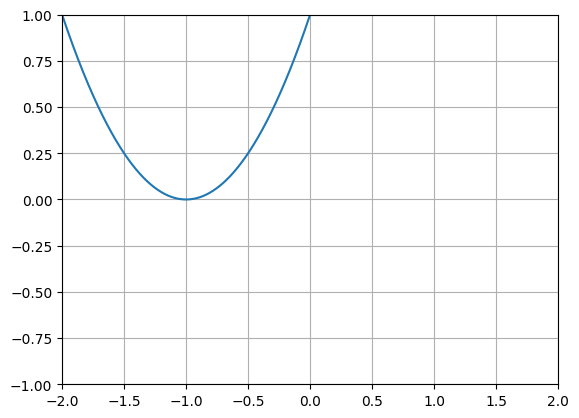

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy import optimize


#Definiendo x como simbolo
x = sp.Symbol('x')



#definiendo la función f
f = x**2 + 2*x + 1

#Calculado la derivada con sympy
derivada = sp.diff(f, x)


#Definición  de algunos parámetros
#************************************
x0=2

tol = 1e-4
contador=0
max_inter=100
#************************************


#ciclo de iteración con condiciónes
#**********************************************************************
while (abs(f.subs(x, x0)).evalf() > tol)  and  (contador < max_inter) :

    xsig = x0 - f.subs(x, x0).evalf()/derivada.subs(x, x0).evalf()
    x0 = xsig
    contador +=1
#**********************************************************************


#convertir la derivada y la función en funciones númericas
#para poder graficarlas y también poder usarla con optimize
#**********************************************************
f_numerica = sp.lambdify(x, f, 'numpy')
derivada_numerica = sp.lambdify(x,derivada,'numpy')
#*********************************************************

#imprimiento raizes
print(x0)
print('Usando optimize : ', optimize.newton(f_numerica , 2 , derivada_numerica))


#graficando
x1= np.linspace(-2,2,1000)

plt.plot(x1,f_numerica(x1))
plt.xlim(-2,2)
plt.ylim(-1,1)
plt.grid()


<font color='#0080'> **Metodo de la secante**

-1.7548784130270172
Usando optimize:  -1.7548776662466925


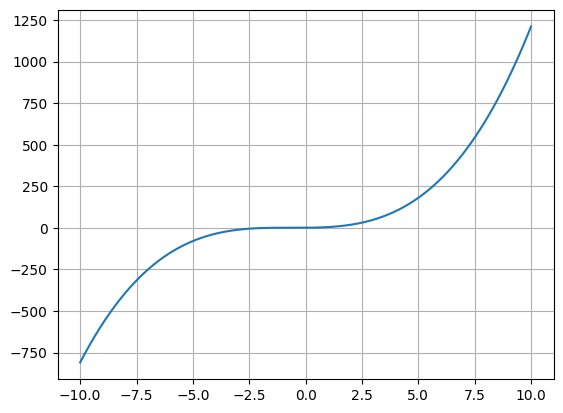

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

def f(x):
    return x**3+2*x**2+x+1

#definición de algunos parámetros
#*******************************
contador = 0
tol = 1e-4
x0= 0.5
x_sig = 1
x0_iter = x0
#*******************************

#ciclo con la interacion y  las condiciones
#**************************************************************************
while (abs(f(x0)) > tol) and (contador < 500):
    x_sig = x0 - f(x0)/( ( f(x_sig) - f(x0_iter) ) / ( x_sig - x0_iter ) )
    x0_iter = x0
    x0 = x_sig
#***************************************************************************

#imprimir raices
print(x0)
print('Usando optimize: ',optimize.newton(f,0.5))



#grafica
valores_x = np.linspace(-10,10,1000)

plt.plot(valores_x,f(valores_x))
plt.grid()


<font color = '#008000'>**Método del punto fijo**</font>

1.0000019999404175
Usando optimize :  1.0000026084539466


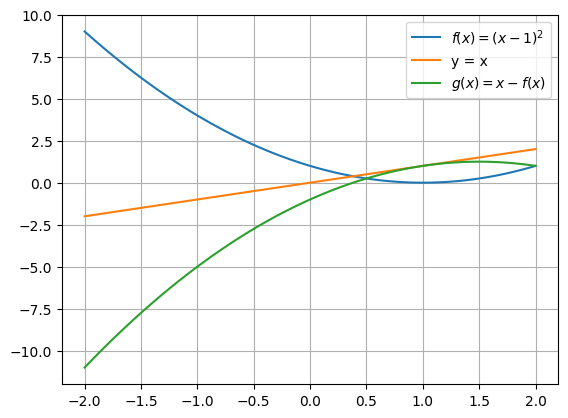

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Definición de algunas funciones
#*******************************
def f(x):
    return (x-1)**2

def f2(x):
    return(x)

def g(x):
    return f2(x)-f(x)
#********************************

#definicion de algunos parámetros
#********************************
x_ini = 1.5
tol=1e-15
cont=0
#********************************


#ciclo con la iteración y condiciones
#***************************************
while (abs(f(x_ini)>tol))and(cont<500000):

    x_sig= g(x_ini)
    x_ini= x_sig
    cont+= 1
#*************************************



#imprimir raices
print(x_sig)
print('Usando optimize : ',optimize.fixed_point(g,1.5))




#grafica

valores_x=np.linspace(-2,2,100)

plt.plot(valores_x,f(valores_x),label='$f(x) =(x-1)^2 $')
plt.plot(valores_x,f2(valores_x),label='y = x')
plt.plot(valores_x,g(valores_x),label='$g(x)=x-f(x)$')
plt.legend()
plt.grid()



<font color = '0080' >**Interpolación lineal**</font>

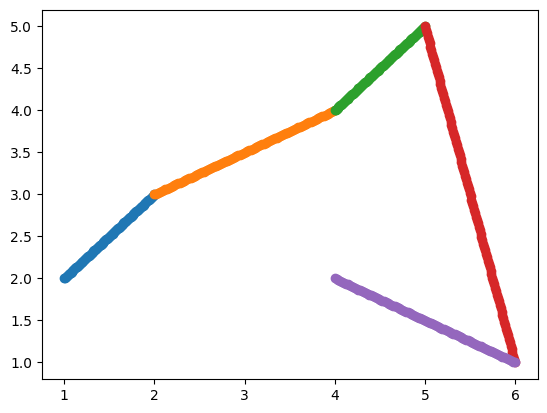

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#funcion para calcular la pendiente de la recta entre dos puntos
#**************************************************************
def pendiente(x0,x1,y0,y1):
    return (y0-y1)/(x0-x1)
#***************************************************************

#puntos solbre los cuales se realizará la interpolación
#******************************************************
puntos_x =np.array([1,2,4,5,6,4])
puntos_y=np.array([2,3,4,5,1,2])
#******************************************************

for i in range(0,len(puntos_x)-1):

    m = pendiente(puntos_x[i],puntos_x[i+1],puntos_y[i],puntos_y[i+1])
    x =np.linspace(puntos_x[i],puntos_x[i+1],100)
    y = m*(x-puntos_x[i])+ puntos_y[i]
    plt.scatter(x,y)








